# Equivilent Width

This notebook compares pseudo-equivilent widths (pW) between CMFGEN models and CSP spectroscopy. pW values are determine according to the prescription set forth in the CSP DR1 data release Folatelli et al. 2013. For each feature, "the pW is obtained by defining a straight 'continuum' level between two neighboring flux peaks and computing the integral of the spectrum flux relative to the continuum" (Folatelli 2013).


In [1]:
import sys

from astropy.table import Table
from matplotlib import pyplot as plt
from sndata.csp import dr1 as data_release
from specutils.analysis import equivalent_width
from specutils.fitting import fit_generic_continuum

sys.path.insert(0, '../')
from analysis.pseudo_ew import feature_table, get_continuum_func, \
    get_feature_coordinates, UnobservedFeature

data_release.download_module_data()


In [2]:
def get_spectra_for_id(obj_id):
    """Get spectral data for a given data id

    Args:
        obj_id (str): The ID of the desired object

    Returns:
        A list of observed MJD dates for each spectra
        A 2d list of wavelength values for each date
        A 2d list of flux values for each date
    """

    data = data_release.get_data_for_id(obj_id)
    obs_dates = list(set(data['date']))

    wavelength, flux = [], []
    for date in obs_dates:
        data_for_date = data[data['date'] == date]
        wavelength.append(data_for_date['wavelength'])
        flux.append(data_for_date['flux'])

    return obs_dates, wavelength, flux


def plot_spectra(obs_dates, wavelength, flux, fig=None, axis=None, **kwargs):
    """Plot spectra and their continuums
    
    Args:
        obs_dates  (list): A list of observed MJD dates for each spectra
        wavelength (list): A 2d list of wavelength values for each date
        flux       (list): A 2d list of flux values for each date
    """
    
    if fig is None or axis is None:
        fig, axis = plt.subplots(1, 1, figsize=(10, 10))
        
    plot_data = zip(obs_dates, wavelength, flux)
    
    for date, wave, flux in plot_data:
        axis.plot(wave, flux, label=str(date), **kwargs)
        axis.legend()
    
    return fig, axis  


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c253ce3c8>)

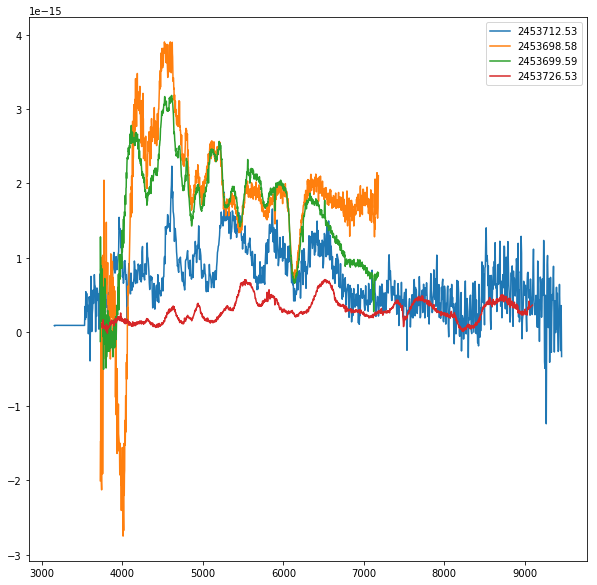

In [3]:
obs_dates, wavelength, flux = get_spectra_for_id('2005kc')
plot_spectra(obs_dates, wavelength, flux)


## Fitting the Continuum

We consider the same set of features considered in Folatelli et al. 2013.

In [4]:
feature_table

feature_name,feature_id,lower_blue,upper_blue,lower_red,upper_red
str3,str17,int64,int64,int64,int64
pW1,Ca ii H&K,3500,3800,3900,4100
pW2,Si ii λ4130,3900,4000,4000,4150
pW3,"Mg ii, Fe ii",3900,4150,4450,4700
pW4,"Fe ii, Si ii",4500,4700,5050,5550
pW5,"S ii λ5449, λ5622",5150,5300,5500,5700
pW6,Si ii λ5972,5550,5700,5800,6000
pW7,Si ii λ6355,5800,6000,6200,6600
pW8,Ca ii IR triplet,7500,8000,8200,8900


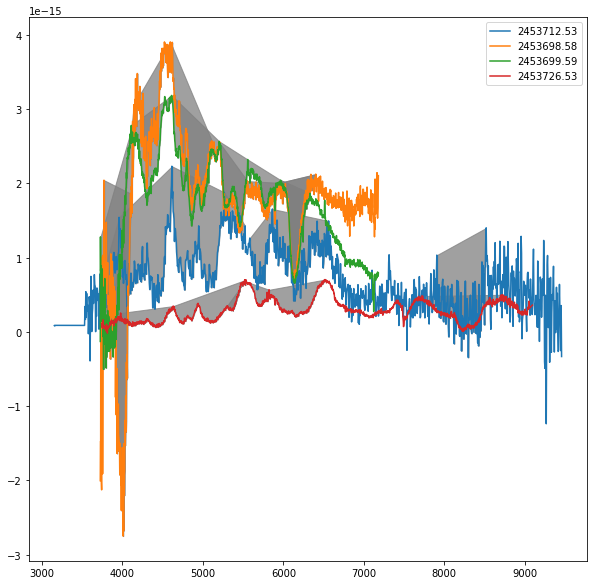

In [5]:
spectral_data = get_spectra_for_id('2005kc')
fig, axis = plot_spectra(*spectral_data)

for obs_dates, wavelength, flux in zip(*spectral_data):
    for feature in feature_table:
        try:
            feat_wave, feat_flux = get_feature_coordinates(wavelength, flux, feature)
        
        except UnobservedFeature:
            pass
        
        
        cont_func = get_continuum_func(*feat_wave, *feat_flux)
        
        indices = (feat_wave[0] < wavelength) & (wavelength < feat_wave[1])
        spectral_wave = wavelength[indices]
        spectral_flux = flux[indices]
        continuum_flux = cont_func(spectral_wave)
        
        axis.fill_between(spectral_wave, spectral_flux, continuum_flux, color='grey', alpha=.75)
            

## Validating Against CSP


In [6]:
# Todo

## Comparing with CMFGEN

In [7]:
# Todo